1. Preprocessing

In [166]:
# Importing the libraries we'll need in preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [167]:
# Using the pandas library to read the csv file
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [168]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [169]:
# Checking each column for null values
print('Number of Null values')
print('ID:',df['id'].isnull().sum())
print('Gender:',df['gender'].isnull().sum())
print('Age:',df['age'].isnull().sum())
print('Hypertension:',df['hypertension'].isnull().sum())
print('Heart Disease:',df['heart_disease'].isnull().sum())
print('Ever Married:',df['ever_married'].isnull().sum())
print('Work Type:',df['work_type'].isnull().sum())
print('Residence Type:',df['Residence_type'].isnull().sum())
print('Average Glucose Level:',df['avg_glucose_level'].isnull().sum())
print('BMI:',df['bmi'].isnull().sum())
print('Smoking Status:',df['smoking_status'].isnull().sum())
print('Stroke:',df['stroke'].isnull().sum())

Number of Null values
ID: 0
Gender: 0
Age: 0
Hypertension: 0
Heart Disease: 0
Ever Married: 0
Work Type: 0
Residence Type: 0
Average Glucose Level: 0
BMI: 201
Smoking Status: 0
Stroke: 0


In [170]:
# Dropping null values
df=df.dropna()

In [171]:
# Checking for duplication in unique columns
df['id'].duplicated().sum()

0

In [172]:
# Printing the unique contents of each column
print('Unique Contents of Each Column')
print('Gender:',df['gender'].unique())
print('Hypertension:',df['hypertension'].unique())
print('Heart Disease:',df['heart_disease'].unique())
print('Ever Married:',df['ever_married'].unique())
print('Work Type:',df['work_type'].unique())
print('Residence Type:',df['Residence_type'].unique())
print('Smoking Status:',df['smoking_status'].unique())
print('Stroke:',df['stroke'].unique())

Unique Contents of Each Column
Gender: ['Male' 'Female']
Hypertension: [0 1]
Heart Disease: [1 0]
Ever Married: ['Yes' 'No']
Work Type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence Type: ['Urban' 'Rural']
Smoking Status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Stroke: [1 0]


In [173]:
# Replacing the Yes values with 1 and the No values with 0
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

In [174]:
# Checking to see if the average glucose level and BMI columns have any negative values
print((df['avg_glucose_level'] < 0).values.any())
print((df['bmi'] < 0).values.any())

False
False


In [175]:
# Standardizing values to a more preferable form
df['work_type'] = df['work_type'].replace({'children': 'Children', 
                                           'Govt_job': 'Government Job',
                                           'Self-employed':'Self-Employed',
                                           'Never_worked':'Never Worked'})
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 'Formerly Smoked', 
                                                     'never smoked': 'Never Smoked',
                                                     'smokes':'Currently Smokes'})

In [176]:
# Standardizing column names to a more preferable form
df=df.rename(columns={'id':'ID','gender':'Gender','age':'Age',
                      'hypertension':'Hypertension','heart_disease':'Heart Disease',
                      'ever_married':'Ever Married','work_type':'Work Type',
                      'Residence_type':'Residence Type',
                      'avg_glucose_level':'Average Glucose Level',
                      'bmi':'BMI','smoking_status':'Smoking Status',
                      'stroke':'Stroke'})

In [177]:
df.head()

,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,Formerly Smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,Never Smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,Currently Smokes,1
4,1665,Female,79.0,1,0,1,Self-Employed,Rural,174.12,24.0,Never Smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,Formerly Smoked,1


In [178]:
# Saving the cleaned dataframe as a csv file
df.to_csv('CleanedData.csv')

2. Clustering Algorithms

KMedoids Clustering

In [179]:
# Importing the library we'll use in KMedoids
from sklearn_extra.cluster import KMedoids

In [180]:
# Choosing the columns we'll use for clustering
clustering_data=df[['Age','Average Glucose Level','BMI']]
clustering_data=np.array(clustering_data)
clustering_data

array([[ 67.  , 228.69,  36.6 ],
       [ 80.  , 105.92,  32.5 ],
       [ 49.  , 171.23,  34.4 ],
       ...,
       [ 35.  ,  82.99,  30.6 ],
       [ 51.  , 166.29,  25.6 ],
       [ 44.  ,  85.28,  26.2 ]])

Using 2 Different Methods to determine the ideal number of clusters

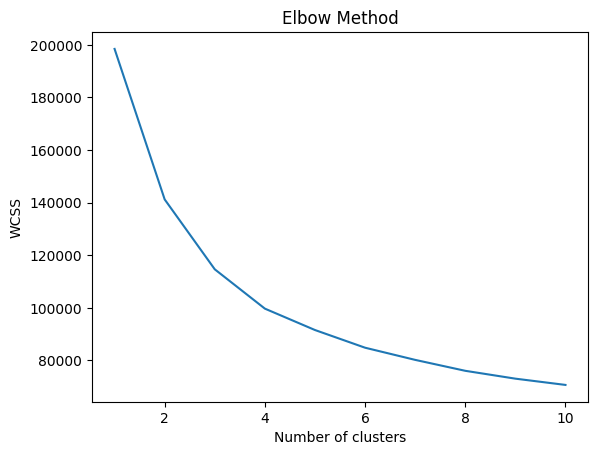

In [181]:
# Elbow Method

# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(clustering_data)
    wcss.append(kmedoids.inertia_)

# Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

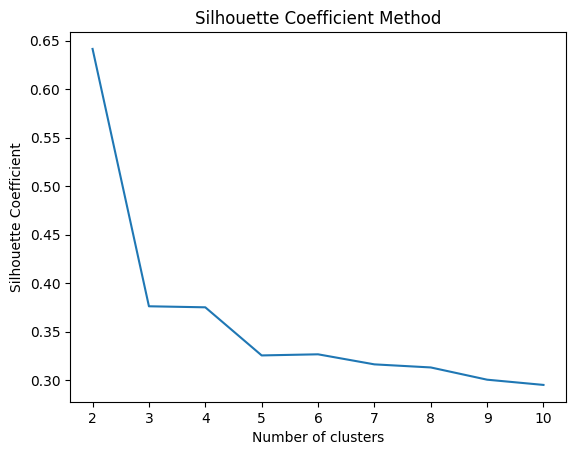

In [182]:
# Silhouette Method

# Import the library we'll use
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient for different values of k
silhouette_scores = []
for i in range(2, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    cluster_labels = kmedoids.fit_predict(clustering_data)
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Coefficient method graph
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

From the 2 methods we've determined that the optimal of clusters is 2

In [183]:
# Choosing the number of clusters as 2
k=2

# Using the kmedoids algorithm on our data
kmedoids=KMedoids(n_clusters=k).fit(clustering_data)
clusters=kmedoids.cluster_centers_
labels=kmedoids.labels_

# Add cluster labels to DataFrame
df['Cluster'] = labels

print('Lables :',labels, "\n")
print('Clusters :',clusters, "\n")

for j in range(k):
    for i in range(len(clustering_data)):
        if (kmedoids.labels_[i]==j):
            x=clustering_data[i]
            print("Cluster", j ,':', x)

Lables : [1 0 1 ... 0 1 0] 

Clusters : [[ 41.    87.06  30.  ]
 [ 61.   203.76  33.8 ]] 

Cluster 0 : [ 80.   105.92  32.5 ]
Cluster 0 : [74.   70.09 27.4 ]
Cluster 0 : [69.   94.39 22.8 ]
Cluster 0 : [78.   58.57 24.2 ]
Cluster 0 : [81.   80.43 29.7 ]
Cluster 0 : [ 61.   120.46  36.8 ]
Cluster 0 : [ 54.   104.51  27.3 ]
Cluster 0 : [60.   89.22 37.8 ]
Cluster 0 : [ 71.   102.87  27.2 ]
Cluster 0 : [ 80.   104.12  23.5 ]
Cluster 0 : [ 65.   100.98  28.2 ]
Cluster 0 : [42.   83.41 25.4 ]
Cluster 0 : [48.  84.2 29.7]
Cluster 0 : [82.   84.03 26.5 ]
Cluster 0 : [72.   74.63 23.1 ]
Cluster 0 : [58.   92.62 32.  ]
Cluster 0 : [49.   60.91 29.9 ]
Cluster 0 : [78.   78.03 23.9 ]
Cluster 0 : [54.   71.22 28.5 ]
Cluster 0 : [ 58.   107.26  38.6 ]
Cluster 0 : [81.   99.33 33.7 ]
Cluster 0 : [39.   58.09 39.2 ]
Cluster 0 : [ 79.   127.29  27.7 ]
Cluster 0 : [ 77.   124.13  31.4 ]
Cluster 0 : [82.   59.32 33.2 ]
Cluster 0 : [80.  74.9 22.2]
Cluster 0 : [67.   61.94 25.3 ]
Cluster 0 : [45.   93.72

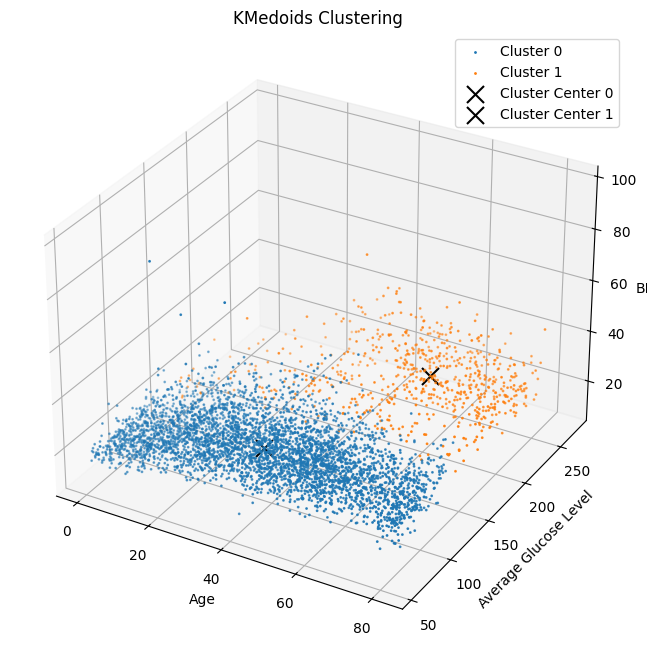

In [184]:
# Plotting the clusters in a 3d scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point with its cluster color
for i in range(k):
    cluster_points = clustering_data[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label='Cluster {}'.format(i),s=1)

# Plot cluster centers after plotting the points
for i in range(2):
    ax.scatter(clusters[i, 0], clusters[i, 1], clusters[i, 2], c='black', marker='x', s=150, label='Cluster Center {}'.format(i))

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
ax.set_title('KMedoids Clustering')
ax.legend()
plt.show()

In [231]:
# Accuracy calculation
equal_count = (df['Stroke'] == df['Cluster']).sum()
total_count = len(df)
percentage_equal = (equal_count / total_count)

print(f"The percentage of matching clusters with Stroke values: {percentage_equal.round(6)*100}%")

The percentage of matching clusters: 84.8818%


Hierarchical Clustering

In [186]:
# Importing the library we'll use
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster

In [187]:
# We form the linkage the with various methods
x1 = clustering_data
z1 = linkage(x1, method='single', metric='euclidean')
z2 = linkage(x1, method='complete', metric='euclidean')
z3 = linkage(x1, method='average', metric='euclidean')
z4 = linkage(x1, method='ward', metric='euclidean')

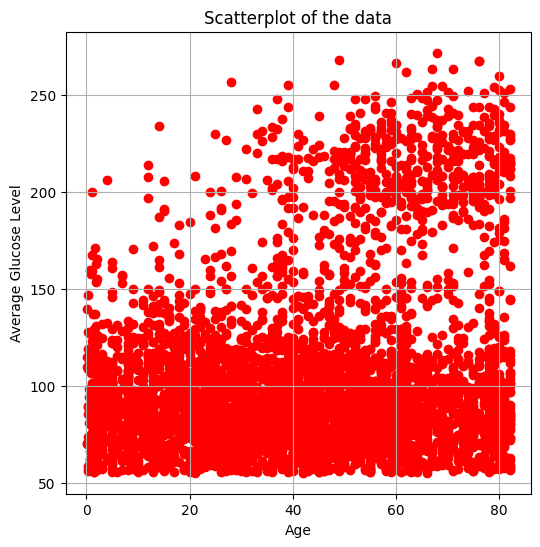

In [188]:
# Graph the data using scatterplot
plt.figure(figsize=(6,6))
plt.scatter(x1[:,0], x1[:,1], c='r')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title("Scatterplot of the data")
plt.grid()
plt.show()

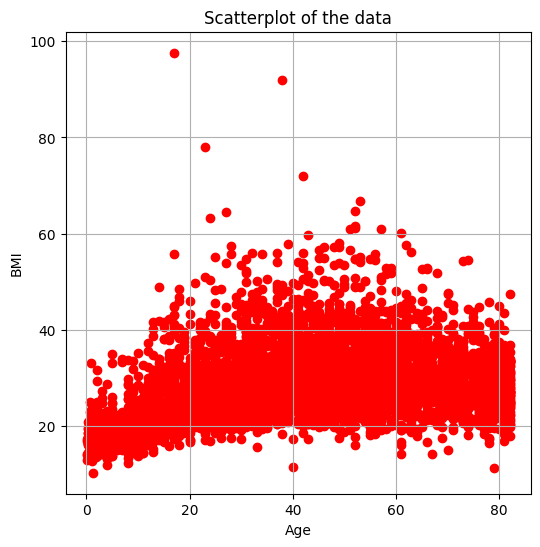

In [189]:
# Graph the data using scatterplot
plt.figure(figsize=(6,6))
plt.scatter(x1[:,0], x1[:,2], c='r')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title("Scatterplot of the data")
plt.grid()
plt.show()

In [190]:
# Here we pass the dendrograms to matplotlib to view the 4 plots of the linkages using figure and subplot functions
plt.figure(figsize=(16,12))
plt.subplot(2,2,1), dendrogram(z1) , plt.title('single')
plt.subplot(2,2,2), dendrogram(z2) , plt.title('complete')
plt.subplot(2,2,3), dendrogram(z3) , plt.title('average')
plt.subplot(2,2,4), dendrogram(z4) , plt.title('ward')
plt.show()

The truncate_mode parameter in the dendrogram function is used to condense the dendrogram in cases where the original observation matrix is large and the full dendrogram would be too dense and difficult to read. When truncate_mode is set to 'lastp', it means that only the last p non-singleton clusters formed in the linkage are shown as non-leaf nodes in the dendrogram. All other non-singleton clusters that were formed earlier in the linkage process are contracted into leaf nodes

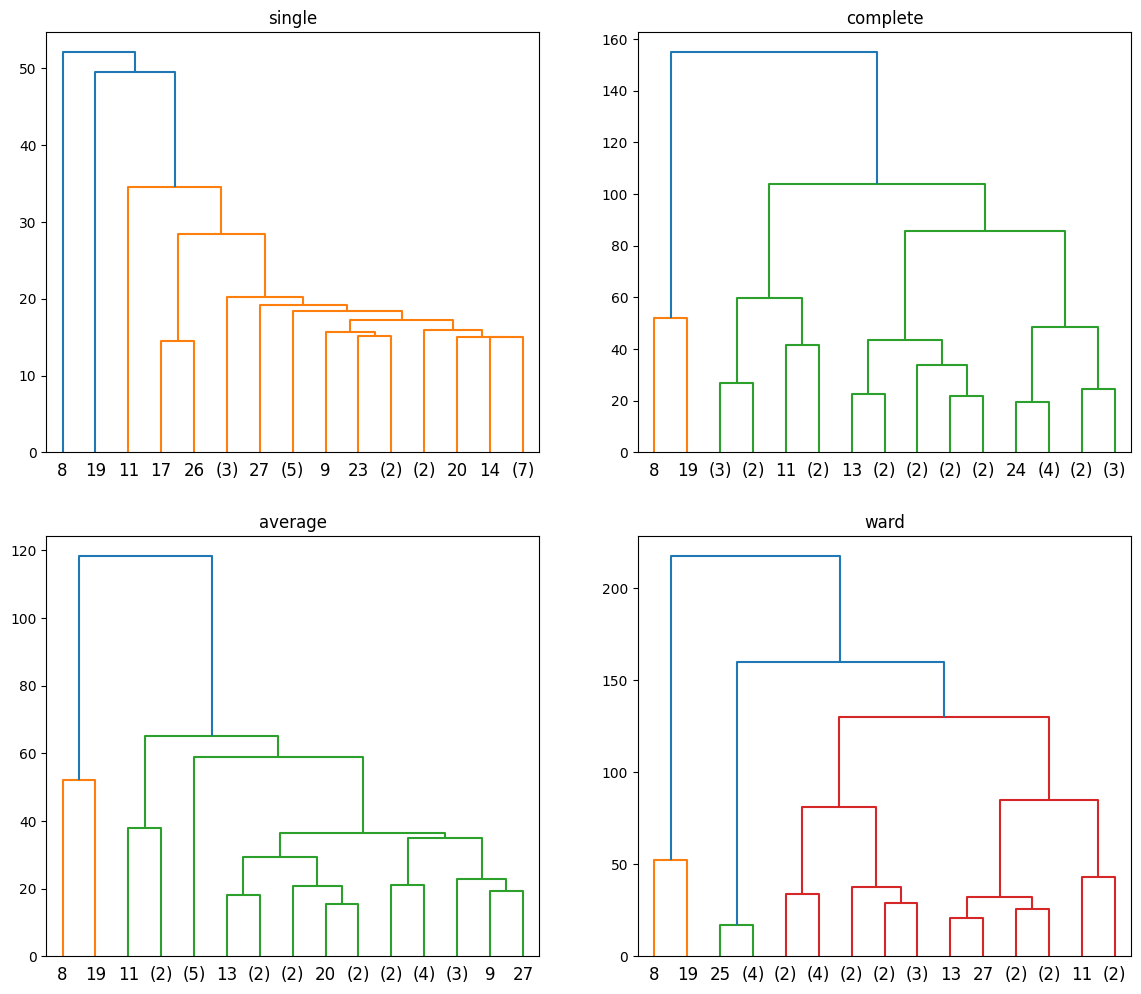

In [220]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1), dendrogram(z1,truncate_mode='lastp',p=15) , plt.title('single')
plt.subplot(2,2,2), dendrogram(z2,truncate_mode='lastp',p=15) , plt.title('complete')
plt.subplot(2,2,3), dendrogram(z3,truncate_mode='lastp',p=15) , plt.title('average')
plt.subplot(2,2,4), dendrogram(z4,truncate_mode='lastp',p=15) , plt.title('ward')
plt.show()

In [192]:
# Here we fcluster to find cluster for any linkagea
# For example we use Ward linkage
f1=fcluster(z4,2)
print(f"Clusters: {f1}")

Clusters: [1 1 1 ... 1 1 1]


In [193]:
# indexing begins from one not zero
f1=fcluster(z4,2,criterion='maxclust')
print(f"Clusters: {f1}")

Clusters: [1 2 1 ... 2 1 2]


In [194]:
d=pd.DataFrame(f1)
print((d!=1).values.any())

True



"Applying the hierarchical function to a sample of the data to make it clner and more understandabl."

In [195]:
# Sample a fraction of the data, e.g., 0.006
clustering_data_sample = df[['Age', 'Average Glucose Level', 'BMI']].sample(frac=0.006, random_state=100)

In [196]:
# Perform hierarchical clustering using various linkage methods
x1 = clustering_data_sample
z1 = linkage(x1, method='single', metric='euclidean')
z2 = linkage(x1, method='complete', metric='euclidean')
z3 = linkage(x1, method='average', metric='euclidean')
z4 = linkage(x1, method='ward', metric='euclidean')

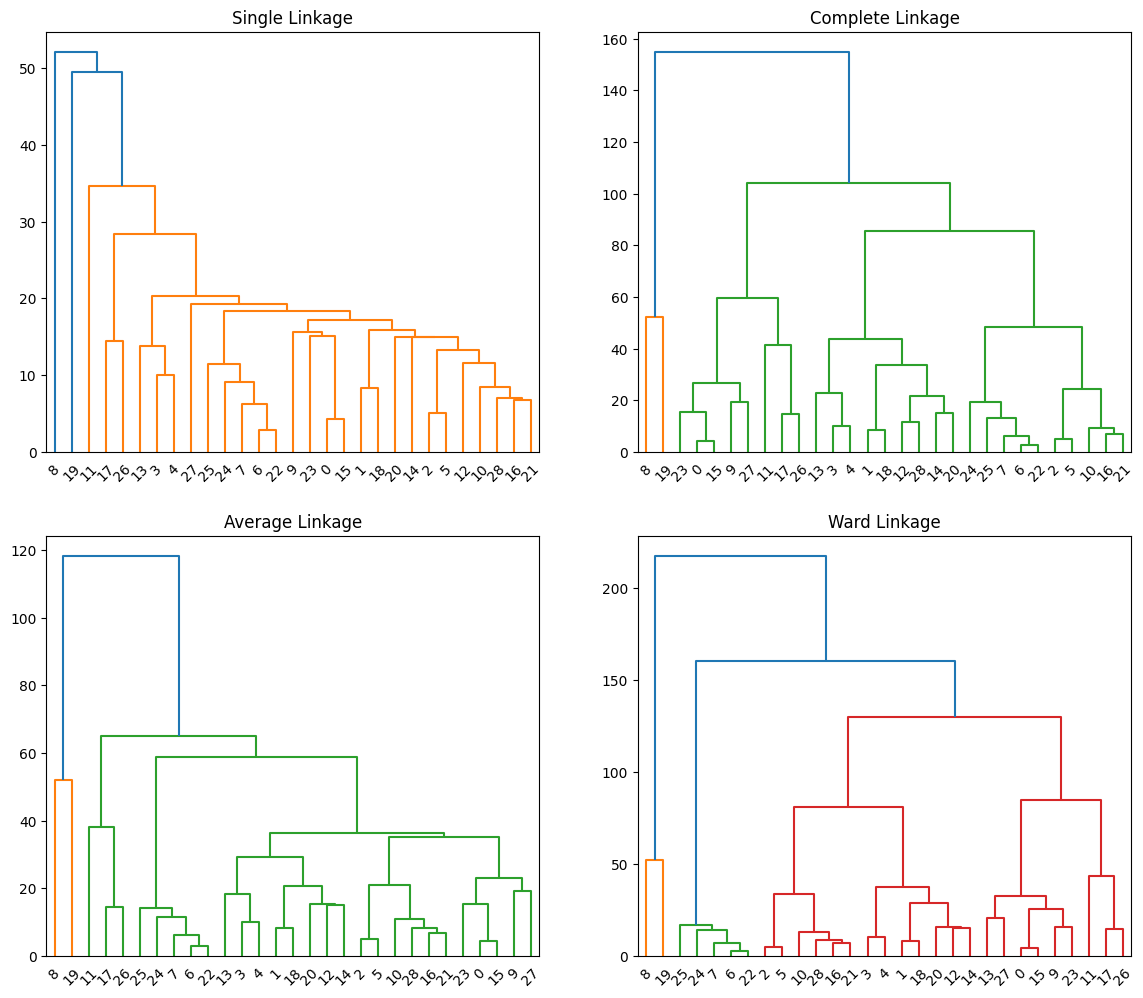

In [221]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1), dendrogram(z1), plt.title('Single Linkage')
plt.subplot(2, 2, 2), dendrogram(z2), plt.title('Complete Linkage')
plt.subplot(2, 2, 3), dendrogram(z3), plt.title('Average Linkage')
plt.subplot(2, 2, 4), dendrogram(z4), plt.title('Ward Linkage')
plt.show()

In [198]:
cluster1=[]
cluster2=[]
for i in f1:
    if f1[i]==2:
        cluster2.append(f1[i])
    else:
        cluster1.append(f1[i])

print('Number of people who dont have a stroke according to fcluster:',len(cluster1))
print('Number of people who have a stroke according to fcluster:',len(cluster2))

Number of people who dont have a stroke according to fcluster: 4341
Number of people who have a stroke according to fcluster: 567


In [235]:
df['Stroke'].value_counts()

Stroke
0    4699
1     209
Name: count, dtype: int64

In [232]:
comparison=len(cluster1)/df['Stroke'].value_counts().get(0, 0)
print(f'Number of people who dont have a Stroke according to fcluster compared to Stroke values: {comparison.round(6)*100}%')

Number of people who dont have a Stroke according to fcluster compared to Stroke values: 92.3814%


Fuzzy Clustering

In [201]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [202]:
df['BMI'].min(),df['BMI'].max()

(10.3, 97.6)

In [203]:
df['Average Glucose Level'].min(),df['Average Glucose Level'].max()

(55.12, 271.74)

In [204]:
df['Age'].min(),df['Age'].max()

(0.08, 82.0)

In [205]:
df['Stroke'].min(),df['Stroke'].max()

(0, 1)

In [206]:
# Generate universe variables
bmi = ctrl.Antecedent(np.arange(0, 101, 1), 'bmi')
glucose_level = ctrl.Antecedent(np.arange(0, 301, 1), 'glucose_level')
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
stroke = ctrl.Consequent(np.arange(0, 101, 1), 'stroke')

In [207]:
# Define membership functions for BMI
age['young'] = fuzz.trimf(age.universe, [0, 20, 30]) # triangular
age['middle_aged'] = fuzz.trimf(age.universe, [25, 40, 60])
age['elderly'] = fuzz.trimf(age.universe, [55, 80, 100])

bmi['under_weight'] = fuzz.trimf(bmi.universe, [10.3, 15.88, 20])
bmi['normal_weight'] = fuzz.trimf(bmi.universe, [18.5, 22, 25])
bmi['over_weight'] = fuzz.trimf(bmi.universe, [23.2, 27, 35])
bmi['obese'] = fuzz.trimf(bmi.universe, [30, 60.2, 97.7])

glucose_level['low'] = fuzz.trimf(glucose_level.universe, [30, 45, 60])
glucose_level['normal'] = fuzz.trimf(glucose_level.universe, [50.3, 70, 100])
glucose_level['high'] = fuzz.trimf(glucose_level.universe, [95, 125,275 ])

# Define membership functions for Stroke
stroke['absent'] = fuzz.trimf(stroke.universe, [0, 25, 50])
stroke['present'] = fuzz.trimf(stroke.universe, [45, 75, 100])

Visualizing the membership function

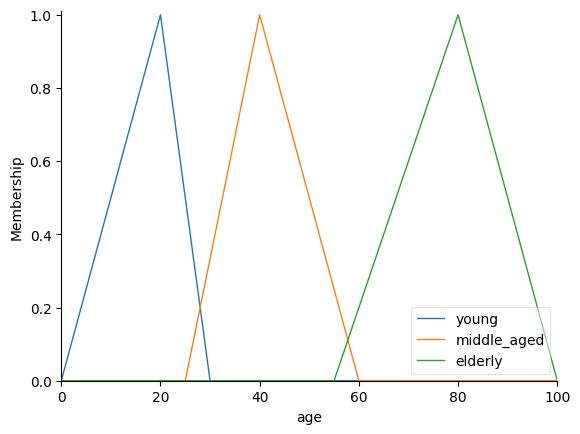

In [208]:
age.view()

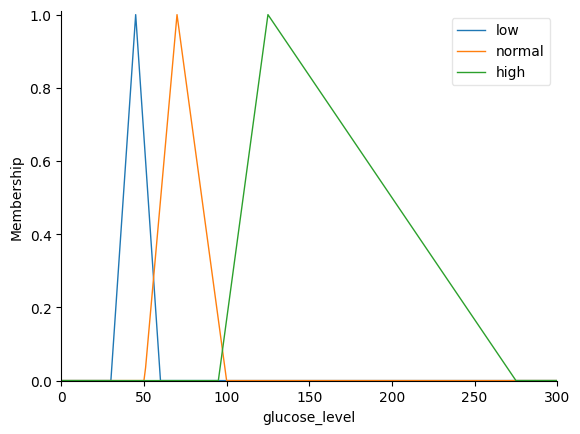

In [209]:
glucose_level.view()

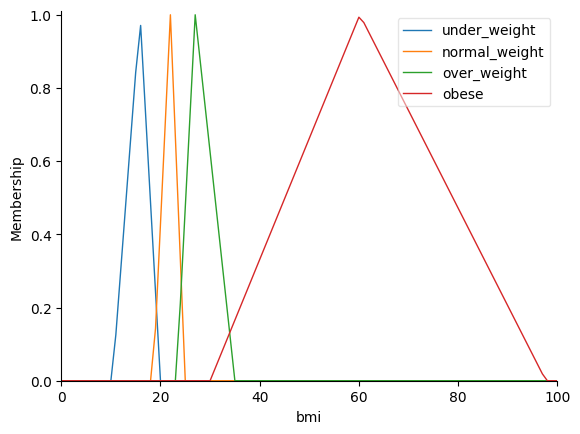

In [210]:
bmi.view()

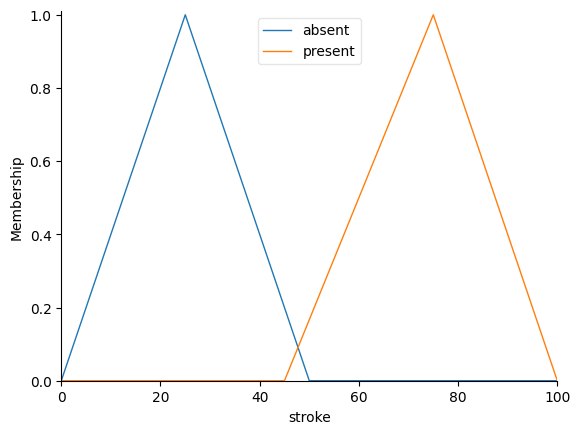

In [211]:
stroke.view()

In [212]:
# Define fuzzy rules
rule1 = ctrl.Rule(bmi['normal_weight'] & glucose_level['normal'] & age['young'], stroke['absent'])
rule2 = ctrl.Rule(bmi['over_weight'] & glucose_level['normal'] & age['middle_aged'], stroke['absent'])
rule3 = ctrl.Rule(bmi['under_weight'] & glucose_level['low'] & age['elderly'], stroke['present'])
rule4 = ctrl.Rule(bmi['obese'] & glucose_level['high'] & age['elderly'], stroke['present'])

In [213]:
# Create a control system
stroke_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# Create a control system simulation
stroke_prediction = ctrl.ControlSystemSimulation(stroke_ctrl)

In [214]:
# Example (1) Prediction
stroke_prediction.input['bmi'] = 70
stroke_prediction.input['glucose_level'] = 150
stroke_prediction.input['age'] = 90
stroke_prediction.compute()

# Print the predicted stroke likelihood
print("Predicted stroke likelihood:", stroke_prediction.output['stroke'],'%')

Predicted stroke likelihood: 73.05555555555554 %


In [215]:
# Example (2) prediction
stroke_prediction2 = ctrl.ControlSystemSimulation(stroke_ctrl)
stroke_prediction2.input['bmi'] = 22
stroke_prediction2.input['glucose_level'] = 70
stroke_prediction2.input['age'] = 20
stroke_prediction2.compute()

# Print the predicted stroke likelihood
print("Predicted stroke likelihood:", stroke_prediction2.output['stroke'],'%')

Predicted stroke likelihood: 24.999999999999996 %


Visualizing the membership for example (1)

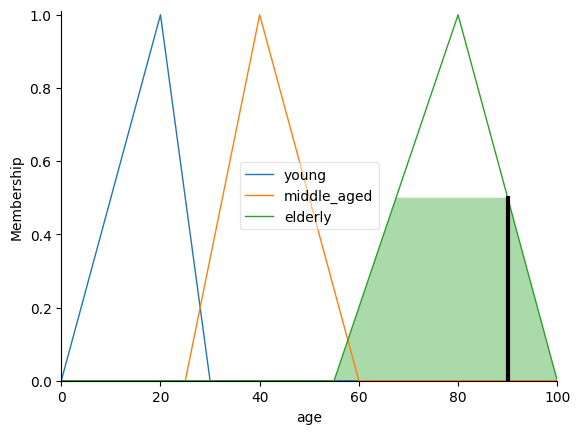

In [216]:
age.view(stroke_prediction)

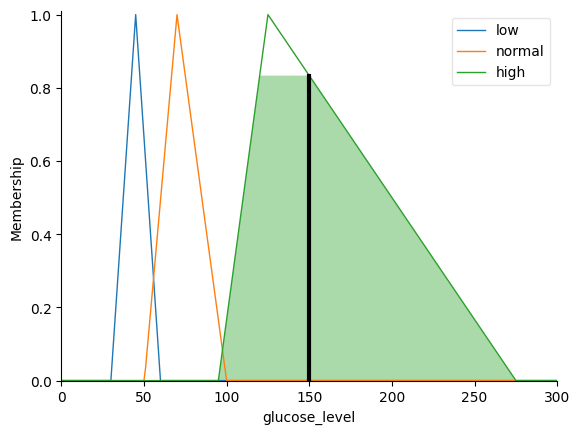

In [217]:
glucose_level.view(stroke_prediction)

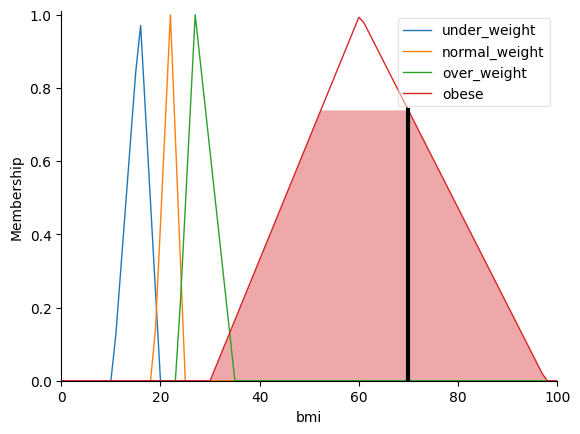

In [218]:
bmi.view(stroke_prediction)